In [1]:
"""
Copyright 2016 Snaplogic
ML Blog Post 2 Jupyter/IPython Workbook

Written by Shayne Hodge.

Note - For unknown reasons, the plot doesn't always update correctly.
In that event, try dragging the slider away and then back to the picked
value.
"""

import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd
from sklearn import svm, cross_validation
from ipywidgets import interact, interactive, fixed
from IPython.display import display
import ipywidgets as widgets
%matplotlib notebook

<IPython.core.display.Javascript object>


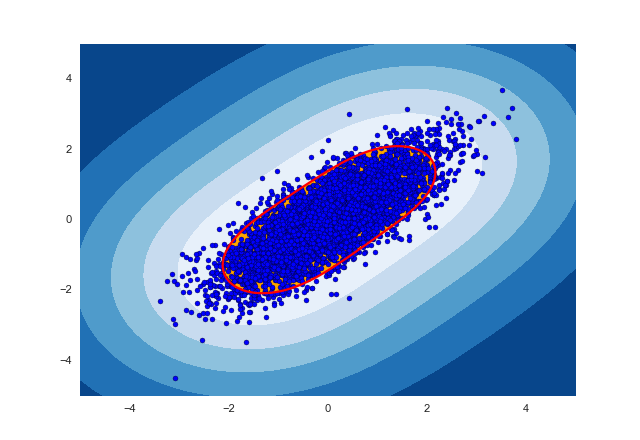

In [2]:

# I don't like using globals, but it's a hack around an interactive() display issue
df = None

# Continuous update set to false means viz_prob only runs when you release a slider
# not as you drag it.  See 
# https://github.com/ipython/ipywidgets/blob/5fc6f9f4e40f083b799d40a12213eb25cba880be/examples/Using%20Interact.ipynb

c12_slider = widgets.FloatSlider(min=0, max=1.2, step=0.01, value=0.9, continuous_update=False)
c21_slider = widgets.FloatSlider(min=0, max=1.2, step=0.01, value=0.9, continuous_update=False)
n_slider = widgets.IntSlider(min=10, max=10000, step=10, value=5000, continuous_update=False)

def viz_prob(c12, c21, size=5000):
    global df
    mu1 = 0
    mu2 = 0
    c11 = 1
    c22 = 1
    mean = np.array([mu1, mu2])
    cov = np.array([[c11, c12], [c21, c22]])
    random_points = np.random.multivariate_normal(mean, cov, size)
    df = pd.DataFrame(random_points, columns=["x", "y"])
    # Fit the model
    (nu, gamma) = (0.1, 0.1)
    clf = svm.OneClassSVM(nu=nu, kernel="rbf", gamma=gamma)
    clf.fit(df)
    sns.set(style="darkgrid", palette="Set2")
    lim = 5 * max(c11, c12, c21, c22)
    (c_x, c_y) = (mu1, mu2)
    xx, yy = np.meshgrid(np.linspace(-c_x-lim, c_x+lim, 250),
                         np.linspace(-c_y-lim, c_y+lim, 250))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plotting
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7),
                 cmap=plt.cm.Blues_r)
    a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')
    plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='orange')
    plt.scatter(df['x'], df['y'])
    plt.xlim((c_x-lim, c_x+lim))
    plt.ylim((c_y-lim, c_y+lim))
    

w = interactive(viz_prob, c12=c12_slider, c21=c21_slider, size=n_slider);
display(w);
